#  __ep 8__ . crawling and 이미지 합치기

### 8.1 네이버 웹툰 목록 크롤링

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
url_1= "http://comic.naver.com/webtoon/list.nhn?"
params_1 = {
    'titleId' : 650305,
    'page' : 1
}
status_1 = requests.get(url_1,params= params_1)
status_1.status_code

200

In [4]:
html_1 = requests.get(url_1,params = params_1).text
soup_1 = BeautifulSoup(html_1,"html.parser")

##### +) html 의 구조를 볼때  개발자 도구를 통해서 위치 나 tag 명들을 1차적으로 파악
##### +) 2차적으로는 반드시 "페이지 소스의 ctrl + F 를통해 위치 찾기" 페이지 소스와 개발자 도구의 내용이 다를 수도 있기 때문이다.

In [13]:
for tag in soup_1.select(".webtoon td.title a"):
    print(tag.text)

2부57화 수구(讐仇)3
2부56화 수구(讐仇)2
2부55화 수구(讐仇)1
2부54화 탈주3
2부53화 탈주2
2부52화 탈주1
2부51화 무케를 구해라! 2
2부50화 무케를구해라! 1
2부49화 비익조(比翼鳥)
2부48화 범찰의 사연


### 1_1. 이제 각 회에 있는 이미지를 다운 받아서 이어보자!

In [19]:
for tag in soup_1.select(".viewList tr"):
    a_tag = tag.find('a')##### tr태그하위를 모두 찾아서 열거해 준다.
    if a_tag is None:
        continue#### 위의 조건을 만족시키면 무시하고 다른 것을 계속해라!!
    print(a_tag)

<a href="http://nstore.naver.com/comic/detail.nhn?originalProductId=198411" onclick="clickcr(this,'lst.gostore','650305','',event);" target="_blank">
<em class="ico_store2">NAVER 만화</em>다음화를 미리 만나보세요.</a>
<a href="/webtoon/detail.nhn?titleId=650305&amp;no=140&amp;weekday=sat" onclick="clickcr(this,'lst.img','650305','140',event)">
<img alt="2부57화 수구(讐仇)3" height="41" onerror="this.src='http://static.comic.naver.net/staticImages/COMICWEB/NAVER/img/common/non71_41.gif'" src="http://thumb.comic.naver.net/webtoon/650305/140/thumbnail_202x120_689d6c4a-3e67-4a83-ab2f-9bde29cd75eb.jpg" title="2부57화 수구(讐仇)3" width="71"/>
<span class="mask"></span>
</a>
<a href="/webtoon/detail.nhn?titleId=650305&amp;no=139&amp;weekday=sat" onclick="clickcr(this,'lst.img','650305','139',event)">
<img alt="2부56화 수구(讐仇)2" height="41" onerror="this.src='http://static.comic.naver.net/staticImages/COMICWEB/NAVER/img/common/non71_41.gif'" src="http://thumb.comic.naver.net/webtoon/650305/139/thumbnail_202x120_ffb1ec4f

##### +) 하지만 여기서 a_tag.text를 출력하라고 입력하면 위의 네이버 공지를 제외하고는 아무것도 뜨지 않는다. -
####  즉 .text 같은 것을 긁어 올때는 해당 태그의 바로 및에 있는 글들만 긁어 오고, 해당 태그안의 태그의 글은 못긁어 온다.!!!!

In [20]:
for tag in soup_1.select(".viewList tr"):
    a_tag = tag.find('a')##### a태그하위를 모두 찾아서 열거해 준다.
    if a_tag is None:
        continue#### 위의 조건을 만족시키면 무시하고 계속해라!!
    print(a_tag.text)


NAVER 만화다음화를 미리 만나보세요.










































### 1_2. select로 한번 설정하고 그하위의 태그를 설정하는 방법 !!!

##### +) select 함수는 기본적으로 리스트로 모든 요소를 return 하고 해당 요소들을 역시 리스트로 지정한다.

In [13]:

for tag in soup_1.select(".viewList tr"):
    ### a_tag를 전역변수로 지정해서 select의 return 값 형태가 list 인지 확인
    global a_tag
    a_tag.append(tag.select("a[href*=detail.nhn]"))

a_tag



[[],
 [<a href="http://nstore.naver.com/comic/detail.nhn?originalProductId=198411" onclick="clickcr(this,'lst.gostore','650305','',event);" target="_blank">
  <em class="ico_store2">NAVER 만화</em>다음화를 미리 만나보세요.</a>],
 [<a href="/webtoon/detail.nhn?titleId=650305&amp;no=140&amp;weekday=sat" onclick="clickcr(this,'lst.img','650305','140',event)">
  <img alt="2부57화 수구(讐仇)3" height="41" onerror="this.src='http://static.comic.naver.net/staticImages/COMICWEB/NAVER/img/common/non71_41.gif'" src="http://thumb.comic.naver.net/webtoon/650305/140/thumbnail_202x120_689d6c4a-3e67-4a83-ab2f-9bde29cd75eb.jpg" title="2부57화 수구(讐仇)3" width="71"/>
  <span class="mask"></span>
  </a>,
  <a href="/webtoon/detail.nhn?titleId=650305&amp;no=140&amp;weekday=sat" onclick="clickcr(this,'lst.title','650305','140',event)">2부57화 수구(讐仇)3</a>],
 [<a href="/webtoon/detail.nhn?titleId=650305&amp;no=139&amp;weekday=sat" onclick="clickcr(this,'lst.img','650305','139',event)">
  <img alt="2부56화 수구(讐仇)2" height="41" onerror

### 1_3. tr 하위에는 2개의 a태그가 존재한다. 여기서 관심있는 첫번째 것만 긁어오자.
######   - 예외 오류를 위해서 try 와 except 함수를 써보자

In [32]:
for tag in soup_1.select(".viewList tr"):
    try:
        a_tag = tag.select('a[href*=/webtoon/detail.nhn]')[0]
    except IndexError:
        continue
    print(a_tag)

<a href="/webtoon/detail.nhn?titleId=650305&amp;no=140&amp;weekday=sat" onclick="clickcr(this,'lst.img','650305','140',event)">
<img alt="2부57화 수구(讐仇)3" height="41" onerror="this.src='http://static.comic.naver.net/staticImages/COMICWEB/NAVER/img/common/non71_41.gif'" src="http://thumb.comic.naver.net/webtoon/650305/140/thumbnail_202x120_689d6c4a-3e67-4a83-ab2f-9bde29cd75eb.jpg" title="2부57화 수구(讐仇)3" width="71"/>
<span class="mask"></span>
</a>
<a href="/webtoon/detail.nhn?titleId=650305&amp;no=139&amp;weekday=sat" onclick="clickcr(this,'lst.img','650305','139',event)">
<img alt="2부56화 수구(讐仇)2" height="41" onerror="this.src='http://static.comic.naver.net/staticImages/COMICWEB/NAVER/img/common/non71_41.gif'" src="http://thumb.comic.naver.net/webtoon/650305/139/thumbnail_202x120_ffb1ec4f-75be-4c75-a564-1095cfb3a490.jpg" title="2부56화 수구(讐仇)2" width="71"/>
<span class="mask"></span>
</a>
<a href="/webtoon/detail.nhn?titleId=650305&amp;no=138&amp;weekday=sat" onclick="clickcr(this,'lst.img',

### 1_4. 이제 원하는 정보는 a_tag 안에 전부 있다 여기서 원하는 정보들만 긁어서 한번에 보여주자
######     - 일반적으로  하위 테그에 있는 url은 핵심 url을 생략하고, get 인자들이 존재한다.
######         => url을 합치는 법!!!!\

#####
#####
#####
#####   + 하위태그를 긁어 오는 것 = a_tag.find("태그명(img)")
#####   + 하위정보를 긁어 오는 것 = a_tag.selcet("a[href*= ~~~~]")


In [38]:
for tag in soup_1.select(".viewList tr"):
    try:
        a_tag = tag.select("a[href*=/webtoon/detail.nhn]")[0]
    except IndexError:
        continue
    a_href = a_tag["href"]

    a_img_tag = a_tag.find("img")
    
    a_img = a_img_tag["src"]
    a_title = a_img_tag["title"]
    print(a_title,a_href,a_img)
    
    ###### href 의 url 이 완벽하지 않다. 앞에 있는 url도 합쳐서 정리해야 완벽한 url이 된다.

2부57화 수구(讐仇)3 /webtoon/detail.nhn?titleId=650305&no=140&weekday=sat http://thumb.comic.naver.net/webtoon/650305/140/thumbnail_202x120_689d6c4a-3e67-4a83-ab2f-9bde29cd75eb.jpg
2부56화 수구(讐仇)2 /webtoon/detail.nhn?titleId=650305&no=139&weekday=sat http://thumb.comic.naver.net/webtoon/650305/139/thumbnail_202x120_ffb1ec4f-75be-4c75-a564-1095cfb3a490.jpg
2부55화 수구(讐仇)1 /webtoon/detail.nhn?titleId=650305&no=138&weekday=sat http://thumb.comic.naver.net/webtoon/650305/138/thumbnail_202x120_4ea2bceb-cdee-4474-b035-32ccab733b8c.jpg
2부54화 탈주3 /webtoon/detail.nhn?titleId=650305&no=137&weekday=sat http://thumb.comic.naver.net/webtoon/650305/137/thumbnail_202x120_9899681b-e7f4-4a2a-a2bb-f30360f4346f.jpg
2부53화 탈주2 /webtoon/detail.nhn?titleId=650305&no=136&weekday=sat http://thumb.comic.naver.net/webtoon/650305/136/thumbnail_202x120_cfd91e89-9468-4214-b4e4-ca4c6b849c68.jpg
2부52화 탈주1 /webtoon/detail.nhn?titleId=650305&no=135&weekday=sat http://thumb.comic.naver.net/webtoon/650305/135/thumbnail_202x120_d45

#### __만약에 반복문에서 조건에 만족하는 것이 한번이라도 존재하면 그 반복문은 거기서 멈춰버린다.!
    예외처리가 반드시 필요하다.

### 1_5. 앞에 생략된 url 도 합쳐서 표현하는 방법.

    urllib.parse import urljoin 이용한다.

In [39]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

In [47]:
url_front= "http://comic.naver.com/webtoon/list.nhn"
params_1 = {
    'titleId' : 650305,
    'page' : 1
}
status_1 = requests.get(url_1,params= params_1)
#status_1.status_code

html_1 = requests.get(url_1,params = params_1).text
soup_1 = BeautifulSoup(html_1,"html.parser")


for tag in soup_1.select(".viewList tr"):
    try:
        a_tag = tag.select("a[href*=/webtoon/detail.nhn]")[0]
    except IndexError:
        continue
    
    a_href = urljoin(url_front,a_tag["href"])
    
    a_img_tag = a_tag.find("img")
    a_img = a_img_tag["src"]
    a_title = a_img_tag["title"]
    
    ## 추가로 신규 웹툰이 있으면 true 로 나오게 되는 것도 지정해 보자.
    
    #is_up = bool(tag.selcet("img[src*=ico_toonup]"))
    #if is_up is true:
    #    is_up = "UP"
    #else:
    #    is_up = ""
    
    
    print("Title :",a_title,"\nUrl :",a_href,"\nImg :",a_img,"\n--------------------")


Title : 2부57화 수구(讐仇)3 
Url : http://comic.naver.com/webtoon/detail.nhn?titleId=650305&no=140&weekday=sat 
Img : http://thumb.comic.naver.net/webtoon/650305/140/thumbnail_202x120_689d6c4a-3e67-4a83-ab2f-9bde29cd75eb.jpg 
--------------------
Title : 2부56화 수구(讐仇)2 
Url : http://comic.naver.com/webtoon/detail.nhn?titleId=650305&no=139&weekday=sat 
Img : http://thumb.comic.naver.net/webtoon/650305/139/thumbnail_202x120_ffb1ec4f-75be-4c75-a564-1095cfb3a490.jpg 
--------------------
Title : 2부55화 수구(讐仇)1 
Url : http://comic.naver.com/webtoon/detail.nhn?titleId=650305&no=138&weekday=sat 
Img : http://thumb.comic.naver.net/webtoon/650305/138/thumbnail_202x120_4ea2bceb-cdee-4474-b035-32ccab733b8c.jpg 
--------------------
Title : 2부54화 탈주3 
Url : http://comic.naver.com/webtoon/detail.nhn?titleId=650305&no=137&weekday=sat 
Img : http://thumb.comic.naver.net/webtoon/650305/137/thumbnail_202x120_9899681b-e7f4-4a2a-a2bb-f30360f4346f.jpg 
--------------------
Title : 2부53화 탈주2 
Url : http://comic.na

### 1_6 이제 모든 페이지를 긁어와 보자!

###### count는 break 나  return 이 일어나기 전까지 계속 끊임없이 지속된다. 
            아니면 무한 루프 일어난다.


###### break 는 바로 상위 for 문만 벋어난다.
###### return 은 전체 함수를 벋어나 준다.
            둘을 구분해서 쓰자!!!

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

In [2]:
from itertools import count
from collections import OrderedDict


def webtoon(title_id):
    url_front= "http://comic.naver.com/webtoon/list.nhn"
    or_dict = OrderedDict()
    
    for page in count(1):
        params_1 = {
            'titleId' : title_id,
            'page' : page
        }
        
        ## 이 밑의 줄은 혹시 몰라서 params 형태를 볼려고 해놓은 코딩!
        print('try {}'.format(params_1))
        
        status_1 = requests.get(url_1,params= params_1)
        #status_1.status_code
        html_1 = requests.get(url_1,params = params_1).text
        soup_1 = BeautifulSoup(html_1,"html.parser")

        for tag in soup_1.select(".viewList tr"):
            try:
                a_tag = tag.select("a[href*=/webtoon/detail.nhn]")[0]
            except IndexError:
                continue
                
            
            a_href = urljoin(url_front,a_tag["href"])

            a_img_tag = a_tag.find("img")
            a_img = a_img_tag["src"]
            a_title = a_img_tag["title"]
            
            if a_href in or_dict:
                return or_dict ##### 전체 함수를 빠져나온다.

            index = {
                "Url" : a_href,
                "title" : a_title,
                "img" : a_img
            }
            or_dict[a_href] = index
            print(or_dict)

In [3]:
webtoon("650305")

try {'titleId': '650305', 'page': 1}


NameError: name 'url_1' is not defined

# 2. 이미지 다운 받기

### 2_1. 이미지 다운 받을 에피소드의 url 긁어오기

In [5]:
import requests
from bs4 import BeautifulSoup

In [6]:
url_img = "http://comic.naver.com/webtoon/detail.nhn?titleId=650305&no=2&weekday=sat"

html_2 = requests.get(url_img).text
soup_2 = BeautifulSoup(html_2,"html.parser")

for tag in soup_2.select(".wt_viewer img"):
    img_2 = tag["src"]
    
### 결과 url 을 클릭하고 새로고침을 누르면 이상한 페이지가 뜬다.
    

### 2_2 이미지 다운 받기

In [76]:
for tag in soup_2.select(".wt_viewer img"):
    img_href = tag["src"]
    ### 이제 다운을 받아보자
    img_data = requests.get(img_href).content
    ### 다운 확인을 위해 print 문
    print(repr(img_data))
    #### 결과가 딱봐도 그림 형태가 아니다. 이럴떄는 header를 의심해야 한다.

b'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n\n<html>\n\n<head>\n\n<style>\n\na:link\t\t\t{font:8pt/11pt verdana; color:red}\n\na:visited\t\t{font:8pt/11pt verdana; color:#4e4e4e}\n\n</style>\n\n<title>HTTP 403 Forbidden</title>\n\n</head>\n\n<script>\n \nfunction Homepage(){\n\n// in real bits, urls get returned to our script like this:\n\n// res://shdocvw.dll/http_404.htm#http://www.DocURL.com/bar.htm \n\n\n\n\tDocURL = document.location.href;\n\n\t\t\n\n\t//this is where the http or https will be, as found by searching for :// but skipping the res://\n\n\tprotocolIndex=DocURL.indexOf("://",4);\n\n\t\n\n\t//this finds the ending slash for the domain server \n\n\tserverIndex=DocURL.indexOf("/",protocolIndex + 3);\n\n\n\n\t\t//for the href, we need a valid URL to the domain. We search for the # symbol to find the begining \n\n\t//of the true URL, and add 1 to skip it - this is the BeginURL value. We use serverIndex as the end marker.\n\n\t//urlresult=DocURL.substring(pr

b'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n\n<html>\n\n<head>\n\n<style>\n\na:link\t\t\t{font:8pt/11pt verdana; color:red}\n\na:visited\t\t{font:8pt/11pt verdana; color:#4e4e4e}\n\n</style>\n\n<title>HTTP 403 Forbidden</title>\n\n</head>\n\n<script>\n \nfunction Homepage(){\n\n// in real bits, urls get returned to our script like this:\n\n// res://shdocvw.dll/http_404.htm#http://www.DocURL.com/bar.htm \n\n\n\n\tDocURL = document.location.href;\n\n\t\t\n\n\t//this is where the http or https will be, as found by searching for :// but skipping the res://\n\n\tprotocolIndex=DocURL.indexOf("://",4);\n\n\t\n\n\t//this finds the ending slash for the domain server \n\n\tserverIndex=DocURL.indexOf("/",protocolIndex + 3);\n\n\n\n\t\t//for the href, we need a valid URL to the domain. We search for the # symbol to find the begining \n\n\t//of the true URL, and add 1 to skip it - this is the BeginURL value. We use serverIndex as the end marker.\n\n\t//urlresult=DocURL.substring(pr

b'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n\n<html>\n\n<head>\n\n<style>\n\na:link\t\t\t{font:8pt/11pt verdana; color:red}\n\na:visited\t\t{font:8pt/11pt verdana; color:#4e4e4e}\n\n</style>\n\n<title>HTTP 403 Forbidden</title>\n\n</head>\n\n<script>\n \nfunction Homepage(){\n\n// in real bits, urls get returned to our script like this:\n\n// res://shdocvw.dll/http_404.htm#http://www.DocURL.com/bar.htm \n\n\n\n\tDocURL = document.location.href;\n\n\t\t\n\n\t//this is where the http or https will be, as found by searching for :// but skipping the res://\n\n\tprotocolIndex=DocURL.indexOf("://",4);\n\n\t\n\n\t//this finds the ending slash for the domain server \n\n\tserverIndex=DocURL.indexOf("/",protocolIndex + 3);\n\n\n\n\t\t//for the href, we need a valid URL to the domain. We search for the # symbol to find the begining \n\n\t//of the true URL, and add 1 to skip it - this is the BeginURL value. We use serverIndex as the end marker.\n\n\t//urlresult=DocURL.substring(pr

b'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n\n<html>\n\n<head>\n\n<style>\n\na:link\t\t\t{font:8pt/11pt verdana; color:red}\n\na:visited\t\t{font:8pt/11pt verdana; color:#4e4e4e}\n\n</style>\n\n<title>HTTP 403 Forbidden</title>\n\n</head>\n\n<script>\n \nfunction Homepage(){\n\n// in real bits, urls get returned to our script like this:\n\n// res://shdocvw.dll/http_404.htm#http://www.DocURL.com/bar.htm \n\n\n\n\tDocURL = document.location.href;\n\n\t\t\n\n\t//this is where the http or https will be, as found by searching for :// but skipping the res://\n\n\tprotocolIndex=DocURL.indexOf("://",4);\n\n\t\n\n\t//this finds the ending slash for the domain server \n\n\tserverIndex=DocURL.indexOf("/",protocolIndex + 3);\n\n\n\n\t\t//for the href, we need a valid URL to the domain. We search for the # symbol to find the begining \n\n\t//of the true URL, and add 1 to skip it - this is the BeginURL value. We use serverIndex as the end marker.\n\n\t//urlresult=DocURL.substring(pr

b'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n\n<html>\n\n<head>\n\n<style>\n\na:link\t\t\t{font:8pt/11pt verdana; color:red}\n\na:visited\t\t{font:8pt/11pt verdana; color:#4e4e4e}\n\n</style>\n\n<title>HTTP 403 Forbidden</title>\n\n</head>\n\n<script>\n \nfunction Homepage(){\n\n// in real bits, urls get returned to our script like this:\n\n// res://shdocvw.dll/http_404.htm#http://www.DocURL.com/bar.htm \n\n\n\n\tDocURL = document.location.href;\n\n\t\t\n\n\t//this is where the http or https will be, as found by searching for :// but skipping the res://\n\n\tprotocolIndex=DocURL.indexOf("://",4);\n\n\t\n\n\t//this finds the ending slash for the domain server \n\n\tserverIndex=DocURL.indexOf("/",protocolIndex + 3);\n\n\n\n\t\t//for the href, we need a valid URL to the domain. We search for the # symbol to find the begining \n\n\t//of the true URL, and add 1 to skip it - this is the BeginURL value. We use serverIndex as the end marker.\n\n\t//urlresult=DocURL.substring(pr

b'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n\n<html>\n\n<head>\n\n<style>\n\na:link\t\t\t{font:8pt/11pt verdana; color:red}\n\na:visited\t\t{font:8pt/11pt verdana; color:#4e4e4e}\n\n</style>\n\n<title>HTTP 403 Forbidden</title>\n\n</head>\n\n<script>\n \nfunction Homepage(){\n\n// in real bits, urls get returned to our script like this:\n\n// res://shdocvw.dll/http_404.htm#http://www.DocURL.com/bar.htm \n\n\n\n\tDocURL = document.location.href;\n\n\t\t\n\n\t//this is where the http or https will be, as found by searching for :// but skipping the res://\n\n\tprotocolIndex=DocURL.indexOf("://",4);\n\n\t\n\n\t//this finds the ending slash for the domain server \n\n\tserverIndex=DocURL.indexOf("/",protocolIndex + 3);\n\n\n\n\t\t//for the href, we need a valid URL to the domain. We search for the # symbol to find the begining \n\n\t//of the true URL, and add 1 to skip it - this is the BeginURL value. We use serverIndex as the end marker.\n\n\t//urlresult=DocURL.substring(pr

b'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n\n<html>\n\n<head>\n\n<style>\n\na:link\t\t\t{font:8pt/11pt verdana; color:red}\n\na:visited\t\t{font:8pt/11pt verdana; color:#4e4e4e}\n\n</style>\n\n<title>HTTP 403 Forbidden</title>\n\n</head>\n\n<script>\n \nfunction Homepage(){\n\n// in real bits, urls get returned to our script like this:\n\n// res://shdocvw.dll/http_404.htm#http://www.DocURL.com/bar.htm \n\n\n\n\tDocURL = document.location.href;\n\n\t\t\n\n\t//this is where the http or https will be, as found by searching for :// but skipping the res://\n\n\tprotocolIndex=DocURL.indexOf("://",4);\n\n\t\n\n\t//this finds the ending slash for the domain server \n\n\tserverIndex=DocURL.indexOf("/",protocolIndex + 3);\n\n\n\n\t\t//for the href, we need a valid URL to the domain. We search for the # symbol to find the begining \n\n\t//of the true URL, and add 1 to skip it - this is the BeginURL value. We use serverIndex as the end marker.\n\n\t//urlresult=DocURL.substring(pr

b'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n\n<html>\n\n<head>\n\n<style>\n\na:link\t\t\t{font:8pt/11pt verdana; color:red}\n\na:visited\t\t{font:8pt/11pt verdana; color:#4e4e4e}\n\n</style>\n\n<title>HTTP 403 Forbidden</title>\n\n</head>\n\n<script>\n \nfunction Homepage(){\n\n// in real bits, urls get returned to our script like this:\n\n// res://shdocvw.dll/http_404.htm#http://www.DocURL.com/bar.htm \n\n\n\n\tDocURL = document.location.href;\n\n\t\t\n\n\t//this is where the http or https will be, as found by searching for :// but skipping the res://\n\n\tprotocolIndex=DocURL.indexOf("://",4);\n\n\t\n\n\t//this finds the ending slash for the domain server \n\n\tserverIndex=DocURL.indexOf("/",protocolIndex + 3);\n\n\n\n\t\t//for the href, we need a valid URL to the domain. We search for the # symbol to find the begining \n\n\t//of the true URL, and add 1 to skip it - this is the BeginURL value. We use serverIndex as the end marker.\n\n\t//urlresult=DocURL.substring(pr

b'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n\n<html>\n\n<head>\n\n<style>\n\na:link\t\t\t{font:8pt/11pt verdana; color:red}\n\na:visited\t\t{font:8pt/11pt verdana; color:#4e4e4e}\n\n</style>\n\n<title>HTTP 403 Forbidden</title>\n\n</head>\n\n<script>\n \nfunction Homepage(){\n\n// in real bits, urls get returned to our script like this:\n\n// res://shdocvw.dll/http_404.htm#http://www.DocURL.com/bar.htm \n\n\n\n\tDocURL = document.location.href;\n\n\t\t\n\n\t//this is where the http or https will be, as found by searching for :// but skipping the res://\n\n\tprotocolIndex=DocURL.indexOf("://",4);\n\n\t\n\n\t//this finds the ending slash for the domain server \n\n\tserverIndex=DocURL.indexOf("/",protocolIndex + 3);\n\n\n\n\t\t//for the href, we need a valid URL to the domain. We search for the # symbol to find the begining \n\n\t//of the true URL, and add 1 to skip it - this is the BeginURL value. We use serverIndex as the end marker.\n\n\t//urlresult=DocURL.substring(pr

b'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n\n<html>\n\n<head>\n\n<style>\n\na:link\t\t\t{font:8pt/11pt verdana; color:red}\n\na:visited\t\t{font:8pt/11pt verdana; color:#4e4e4e}\n\n</style>\n\n<title>HTTP 403 Forbidden</title>\n\n</head>\n\n<script>\n \nfunction Homepage(){\n\n// in real bits, urls get returned to our script like this:\n\n// res://shdocvw.dll/http_404.htm#http://www.DocURL.com/bar.htm \n\n\n\n\tDocURL = document.location.href;\n\n\t\t\n\n\t//this is where the http or https will be, as found by searching for :// but skipping the res://\n\n\tprotocolIndex=DocURL.indexOf("://",4);\n\n\t\n\n\t//this finds the ending slash for the domain server \n\n\tserverIndex=DocURL.indexOf("/",protocolIndex + 3);\n\n\n\n\t\t//for the href, we need a valid URL to the domain. We search for the # symbol to find the begining \n\n\t//of the true URL, and add 1 to skip it - this is the BeginURL value. We use serverIndex as the end marker.\n\n\t//urlresult=DocURL.substring(pr

##### +a) repr 과 str 의 차이
    둘다 기본적으로 숫자를 문자형으로 변환 시키는 함수이다.
    그러나 str은 사용자의 시각적인 면을 위해서 사용
    반면 repr 은 시스템이 해당 객체를 인식을 할때 사용

### 2_3 정상적인 응답을 받기위해서 header 변경

##### 데이터를 파일로 확인하기 위해  실제 저장해 보자.

In [78]:
for tag in soup_2.select(".wt_viewer img"):
    img_href = tag["src"]
    re_headers_1 = {
        "Referer" : url_1
    } 
    
    img_data = requests.get(img_href,headers = re_headers_1).content
    
    #### 파일로 저장해보자
    with open('test_img.jpg',"wb") as f:
        f.write(img_data)
        ### 하나만 저장해보자
    break
    
    

##### +a) with open 의  자료는 해당 jupyter 의 코딩 자료가 잇는 곳에 저장 된다.
    나는 kwon 의 jupyter 에 저장된다.

##### +a) 이미지를 볼 수 있는 2가지 방법
    1) 해당 자료가 저장되어 있는 파일에 들어가서 직접 보기
    2) from IPython.display import image 라이버리를 이용해서 여기서 보기!

### 2_4 jupyter에서 이미지 보기

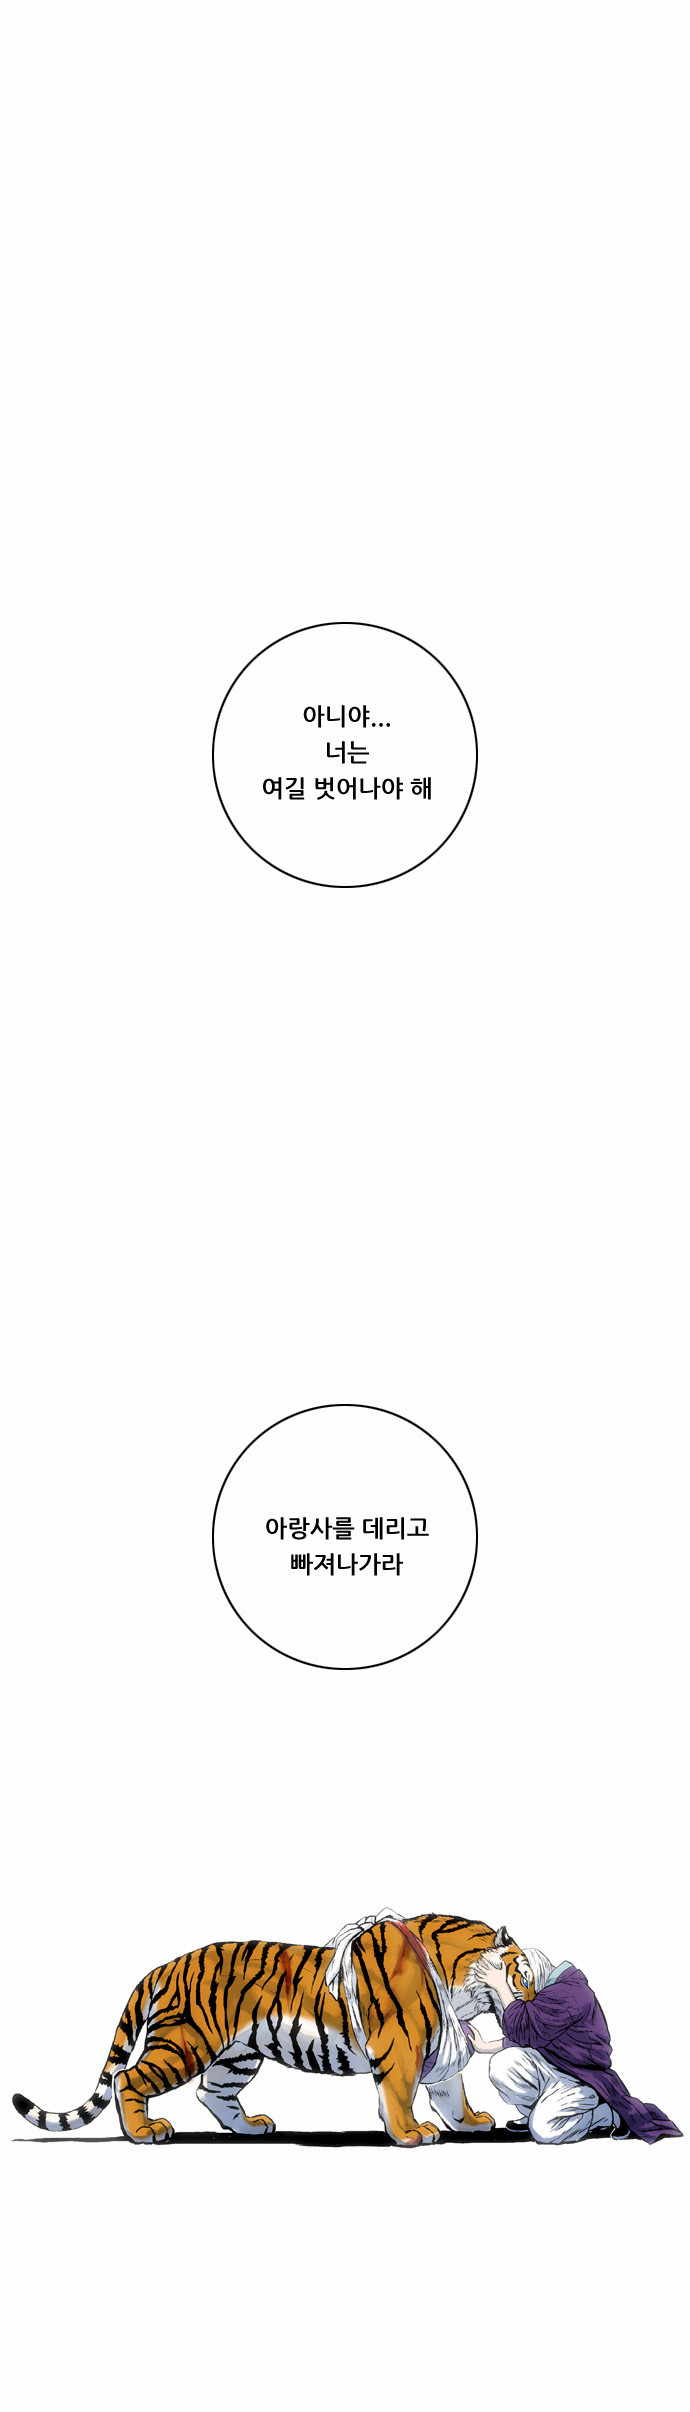

In [2]:
from IPython.display import Image

### 이미지를 저장한 파일 이름으로 불러온다.
    
Image(filename= "test_img.jpg")    

### 2_5 파일을 저장할때, 해당 url 을 이름으로 저장해 보자

    import os 를 통해서

In [1]:
import requests
from bs4 import BeautifulSoup

import os

url_img = "http://comic.naver.com/webtoon/detail.nhn?titleId=650305&no=2&weekday=sat"
url_1 = "http://comic.naver.com/webtoon/list.nhn?titleId=650305&weekday=sat&page=14"
html_2 = requests.get(url_img).text
soup_2 = BeautifulSoup(html_2,"html.parser")


for tag in soup_2.select(".wt_viewer img"):
    img_href = tag["src"]
    re_headers_1 = {
        "Referer" : url_1
    } 
    
    img_data = requests.get(img_href,headers = re_headers_1).content
    ###### 파일이름을 자동으로 path를 해주는 os 라이브러리르 통해서 이름을 만든다.
    img_url = os.path.basename(img_href)
    ##### 파일이름을 매번 변경하게 img_url 의 변수로 쓴다.
    with open(img_url,"wb") as f:
        f.write(img_data)
    

##### +a) OS library 에 관련하여 !
    os 라이브러리 : 운영체제에서 사용되는 여러 기능들을 제공해 주는 라이브러리 이다. 
        ex) 파일을 복사 , 디렉토리 생성 등
    os.path 의 대표적 :
        1) os.path.basename(path) : 입력 받은 경로의 기본이름(가장 낮은 단계 -> 파일명이나, 데이터 이름 등 )
        2) os.path.abspath(path) : 입력 받은 경로를 절대 경로로 변경해서 변환한다.
        참조 = url : "http://devanix.tistory.com/298"

##### +) lib os 에 관하여 연습

In [15]:
filenames_1 = "test_name_1"
filenames_2 = "test_name_2"

for tag in soup_2.select(".wt_viewer img"):
    img_href = tag["src"]
    re_headers_1 = {
        "Referer" : url_1
    } 
    
    img_name = os.path.basename(img_href)
    ####   = img_name 이라는 변수에 img_href의 가장 하단에 있는 path를 반환한다는 의미!
    img_path = os.path.join(filenames_1,filenames_2,img_name)
    ####    = 처음 filenames_1 이는 파일을 만들고 뒤에 filenames_2 이라는 폴더를 만든다 그리고 파일이름은 img_name 으로 정한다.!
    ####    = 이 path 를 이용하여, 파일을 좀더 체계적으로 정리하겠다.!!!!!!
    dir_path = os.path.dirname(img_path)
    ######  = os.path.dirname 은 join 과는 다르게 데이터 이름 (여기서는 jpg)는 제외 시키고 한다. 
    #####   = 단순 파일명만 다룬다.(파일명 = 단순 text형태이다.)
    
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    print(dir_path,"\n","img_path :",img_path)

test_name_1\test_name_2 
 img_path : test_name_1\test_name_2\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_1.jpg
test_name_1\test_name_2 
 img_path : test_name_1\test_name_2\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_2.jpg
test_name_1\test_name_2 
 img_path : test_name_1\test_name_2\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_3.jpg
test_name_1\test_name_2 
 img_path : test_name_1\test_name_2\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_4.jpg
test_name_1\test_name_2 
 img_path : test_name_1\test_name_2\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_5.jpg
test_name_1\test_name_2 
 img_path : test_name_1\test_name_2\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_6.jpg
test_name_1\test_name_2 
 img_path : test_name_1\test_name_2\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_7.jpg
test_name_1\test_name_2 
 img_path : test_name_1\test_name_2\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_8.jpg
test_name_1\test_name_2 

### 2_6 각 에피소드마다 따로따로 저장하기 (dir= 폴더)를 만들어서 저장하기!

    import os 를 통해서

#####  #일단 각 에피소드 파일명 등을 긁어오자!

In [1]:
import requests
from bs4 import BeautifulSoup

import os

In [22]:
url_ep = "http://comic.naver.com/webtoon/detail.nhn?titleId=650305&no=2&weekday=sat"
url_1 = "http://comic.naver.com/webtoon/list.nhn?titleId=650305&weekday=sat&page=14"
html_2 = requests.get(url_ep).text
soup_2 = BeautifulSoup(html_2,"html.parser")

###### 웹툰이름 긁어오기!
web_name = soup_2.select(".comicinfo h2")[0].text.split() ##### split() 함수는 \n 같은 띄어쓰기 명령어를 없애준다.
##### 리스트 안에있는 글자인자들을 하나의 인자로 바꾸기
web_name_2 = " ".join(web_name)


##### 에피소드 이름 긁어오기
ep_name = soup_2.select(".tit_area .view h3")[0].text


for tag in soup_2.select(".wt_viewer img"):
    img_href = tag["src"]
    re_headers_1 = {
        "Referer" : url_1
    } 
    img_data = requests.get(img_href,headers= re_headers_1).content
    
    img_name = os.path.basename(img_href) ### 그림파일명
    img_path = os.path.join(web_name_2,ep_name,img_name) ### 폴더~파일명

    
    with open(img_path,'wb') as f:
        f.write(img_data)
        

FileNotFoundError: [Errno 2] No such file or directory: '호랑이형님 이상규\\2화 창귀호(虎)의 습격\\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_1.jpg'

##### 위에 파일 에러가 뜨는 이유는 해당 path 의 디렉토리가 없기 때문이다 . 디렉토리를 만들어 주자!

In [23]:


### 추가할 것들 
#   dir_path = os.path.dirname(img_path) ### 폴더 명

#  if not os.path.exists(dir_path):
#     os.makedirs(dir_path)

for tag in soup_2.select(".wt_viewer img"):
    img_href = tag["src"]
    re_headers_1 = {
        "Referer" : url_1
    } 
    img_data = requests.get(img_href,headers= re_headers_1).content
    
    img_name = os.path.basename(img_href)
    img_path = os.path.join(web_name_2,ep_name,img_name)
    ####### path 를 만덜어 보자! 
    dir_path = os.path.dirname(img_path) ### path 명( 자동으로 마지막은 파일명이라고 생각하고 dir 만들지 안흔ㄴ다.)

    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    
    with open(img_path,'wb') as f:
        f.write(img_data)
        


##### +a) select 함수를 쓸때 주의사항!
    
    select로 html 을 긁을때 기본적으로 리스트 형태로 반환 하는듯
    -> 그럼으로
            1) for 구문에서는 단순히 tag.text 가능
            2) 그냥 soup_2.select("").text 같은 경우에는
                반드시 인덱싱이 필요
                ex) soup_2.select("")[number]

###### +a) 리스트 안에 글자들을 합치는 방법
    
    join 함수를 이용한다.
    => '글자들 중간에 넣을 것'.join(합칠대상)

In [21]:
test= ["a","b","c"]
' fuck '.join(test)

'a fuck b fuck c'

##### 추가로 계속해서 실행할 때마다 응답을 받지 않게 하는 코딩도 추가!

In [25]:
url_ep = "http://comic.naver.com/webtoon/detail.nhn?titleId=650305&no=2&weekday=sat"
url_1 = "http://comic.naver.com/webtoon/list.nhn?titleId=650305&weekday=sat&page=14"
html_2 = requests.get(url_ep).text
soup_2 = BeautifulSoup(html_2,"html.parser")


for tag in soup_2.select(".wt_viewer img"):
    img_href = tag["src"]
    re_headers_1 = {
        "Referer" : url_1
    } 
    # img_data = requests.get(img_href,headers= re_headers_1).content 이응답을 매번 받지 말고.
    
    img_name = os.path.basename(img_href)
    img_path = os.path.join(web_name_2,ep_name,img_name)
    dir_path = os.path.dirname(img_path)

    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    ######## 요청문 img_path= 파일이 없들때만 받아라.
    if not os.path.exists(img_path):
        img_data = requests.get(img_href,headers= re_headers_1).content
        with open(img_path,'wb') as f:
            f.write(img_data)
        print("Down로드")
    else:
        print("Skip")


Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip


##### 2번 이미지 다운 받는거 정리!

In [ ]:
import requests
from bs4 import BeautifulSoup

import os

In [ ]:
url_ep = "http://comic.naver.com/webtoon/detail.nhn?titleId=650305&no=2&weekday=sat"
url_1 = "http://comic.naver.com/webtoon/list.nhn?titleId=650305&weekday=sat&page=14"
html_2 = requests.get(url_ep).text
soup_2 = BeautifulSoup(html_2,"html.parser")

web_name = soup_2.select(".comicinfo h2")[0].text.split() 
web_name_2 = " ".join(web_name)
ep_name = soup_2.select(".tit_area .view h3")[0].text

for tag in soup_2.select(".wt_viewer img"):
    img_href = tag["src"]
    re_headers_1 = {
        "Referer" : url_1
    }     
    img_name = os.path.basename(img_href)
    img_path = os.path.join(web_name_2,ep_name,img_name)
    dir_path = os.path.dirname(img_path)

    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    if not os.path.exists(img_path):
        img_data = requests.get(img_href,headers= re_headers_1).content
        with open(img_path,'wb') as f:
            f.write(img_data)
        print("Down로드")
    else:
        print("Skip")


# 3. 이미지 합치기(세로로)

### 3_1.  이미지 파일의 이름을 긁어오자
    
 

##### * 일단 각 이미지 파일의 이름을 알아야 한다. 
    해당 함수를 만들어 보자!

In [26]:
import requests
from bs4 import BeautifulSoup

import os

In [31]:
def ep_img_path(ep_url):
    ep_path_list = []
    
    html_2 = requests.get(ep_url).text
    soup_2 = BeautifulSoup(html_2,"html.parser")

    web_name = soup_2.select(".comicinfo h2")[0].text.split() 
    web_name_2 = " ".join(web_name)
    ep_name = soup_2.select(".tit_area .view h3")[0].text

    for tag in soup_2.select(".wt_viewer img"):
        img_href = tag["src"]
        re_headers_1 = {
            "Referer" : url_1
        }     
        img_name = os.path.basename(img_href)
        img_path = os.path.join(web_name_2,ep_name,img_name)
        dir_path = os.path.dirname(img_path)

        #####ep_path_list는 파일명이 필요 , 파일명 => img_path 부분
        
        ep_path_list.append(img_path)
        
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)
        if not os.path.exists(img_path):
            img_data = requests.get(img_href,headers= re_headers_1).content
            with open(img_path,'wb') as f:
                f.write(img_data)
            print("Down로드")
        else:
            print("Skip")
    
    ## 이함수에서 필요한 것은 단순히 path list 이기 때문에 맨처음에 설정한 변수를 리턴 ep_path_list
    return ep_path_list

In [34]:
img_path_list = ep_img_path("http://comic.naver.com/webtoon/detail.nhn?titleId=650305&no=2&weekday=sat")
img_path_list

Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip
Skip


['호랑이형님 이상규\\2화 창귀호(虎)의 습격\\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_1.jpg',
 '호랑이형님 이상규\\2화 창귀호(虎)의 습격\\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_2.jpg',
 '호랑이형님 이상규\\2화 창귀호(虎)의 습격\\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_3.jpg',
 '호랑이형님 이상규\\2화 창귀호(虎)의 습격\\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_4.jpg',
 '호랑이형님 이상규\\2화 창귀호(虎)의 습격\\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_5.jpg',
 '호랑이형님 이상규\\2화 창귀호(虎)의 습격\\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_6.jpg',
 '호랑이형님 이상규\\2화 창귀호(虎)의 습격\\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_7.jpg',
 '호랑이형님 이상규\\2화 창귀호(虎)의 습격\\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_8.jpg',
 '호랑이형님 이상규\\2화 창귀호(虎)의 습격\\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_9.jpg',
 '호랑이형님 이상규\\2화 창귀호(虎)의 습격\\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_10.jpg',
 '호랑이형님 이상규\\2화 창귀호(虎)의 습격\\20150327133807_681b44efd29431cc61debfd994e3c37f_IMAG01_11.jpg

### 3_2. pillow 를통해 이미지 작업
    from PIL import Image

In [35]:
from PIL import Image

##### * 하나의 변수에 이미지파일을(이미지 형태로 => PIL 라이브러리 이용) 저장

In [36]:
im_list = []

for img_path in img_path_list:
    ## 변수에 해당 img_path_list 에 있는 이미지를 저장
    im = Image.open(img_path)
    im_list.append(im)

In [38]:
### 각 파일의 사이즈 등을 알아보자
im_list

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=690x2412 at 0x1A3A2B59A90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=690x1658 at 0x1A3A2F16F98>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=690x1930 at 0x1A3A2C2B0F0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=690x1328 at 0x1A3A2C2B160>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=690x733 at 0x1A3A2C2B208>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=690x2976 at 0x1A3A2C2B278>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=690x1024 at 0x1A3A2C2B438>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=690x1200 at 0x1A3A2C2B4A8>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=690x1408 at 0x1A3A2C2B5C0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=690x2392 at 0x1A3A2C2B630>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=690x1140 at 0x1A3A2C2B6D8>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=690x53 at 0x1A3A2C2B7

In [40]:
im_list[0].size
#im_list[0].widht
#im_list[0].height


(690, 2412)

##### * 저장한 변수를 통해 파일들의 크기들을 알아본다(최대)

    가로 크기 = > 최대
    세로 크기 = > 파일들 길이의 총합

In [60]:
max(x.width for x in im_list)
    ##### x 라는 변수에 im_list 의 각 파일을 반복적으로 집어 넣고 각 파일의 width 를 알아내라

690

In [44]:
sum(y.height for y in im_list)

109713

##### +a) 리스트 안에 있는 요소들의 속성을 확인하는 방법( 복잡한 반복문 말고)

    문법 = 함수(변수.속성함수 for 변수 in 대상)
    ex) img 라는 리스트 안에 있는 이미지들의 세로 길이 속성중 최소 값은?
    
        = min(img_list.height for img_list in img)

##### * 이제 파일들을 담을 전체 큰 도화지 = canvas를 만들자

    canvas 크기를 지정할때 tubple, list 형태로 담는다.

In [53]:
canvas_size = (
    max(x.width for x in im_list),sum(y.height for y in im_list)
)

### canvas를 만들자 -> PIL 라이브러리를 이용해서
canvas = Image.new("RGB",canvas_size)

### 이제 해당 canvas에 이미지를 붙이자(paste)
##### left 는 0,0 으로 고정
##### top  값은 전 이미지들의 높이 누적값


### 둘다 일단 시작은 0,0
left = 0
top = 0

for im in im_list:
    canvas.paste(im, (left,top))
    ### top 을 붙여온 im 파일의 높이만큼 이동시켜야 한다.
    top += im.height
    


##### +a) library(PIL) 에 관해서
    
    좌표계(letf,top) 
        left = x 좌표 (상단)
        top = y 좌표(상단)
        => 각 그림의 좌측상단 꼭지점이 (left,top) = (0,0) 으로 기준점이다.
        

##### * 전체 도화지 canvas 를 저장해보자



In [55]:
canvas.save("mer_im.jpg")
#### os 에러가 뜬다.!!!!

OSError: encoder error -2 when writing image file

In [56]:
### 에러의 원인은 = > jpg 의 최대 지원 높이를 넘어서 그렇다
### png가 더 많은 픽셀을 지원하기 때문에 png로 저장해보자
canvas.save("mer_img.png")

##### *  jpg 로 저장하는 방법 => canvas 의 크기를 최대 지원으로 맞추자

    max = 65500

In [59]:
canvas_size_2 = (
    max(x.width for x in im_list),
    #### 최대 지원 크기 와 전체 크기 합친 것중 작을 것을 써라!
    min(65500,sum(y.height for y in im_list))
)
canvas_2 = Image.new("RGB",canvas_size_2)

left_2 = 0
top_2 = 0

for im in im_list:
    canvas_2.paste(im, (left_2,top_2))

    top_2 += im.height
    
canvas_2.save("mer_img_2.jpg")

###  *3 이미지 합치기 정리


In [63]:
import requests
from bs4 import BeautifulSoup

import os

from PIL import Image

In [64]:
## 이미지의 파일명 함수
def ep_img_path(ep_url):
    ep_path_list = []
    
    html_2 = requests.get(ep_url).text
    soup_2 = BeautifulSoup(html_2,"html.parser")

    web_name = soup_2.select(".comicinfo h2")[0].text.split() 
    web_name_2 = " ".join(web_name)
    ep_name = soup_2.select(".tit_area .view h3")[0].text

    for tag in soup_2.select(".wt_viewer img"):
        img_href = tag["src"]
        re_headers_1 = {
            "Referer" : url_1
        }     
        img_name = os.path.basename(img_href)
        img_path = os.path.join(web_name_2,ep_name,img_name)
        dir_path = os.path.dirname(img_path)

        ep_path_list.append(img_path)
        
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)
        if not os.path.exists(img_path):
            img_data = requests.get(img_href,headers= re_headers_1).content
            with open(img_path,'wb') as f:
                f.write(img_data)
            print("Down로드")
        else:
            print("Skip")
    return ep_path_list

In [ ]:
from PIL import Image

In [ ]:
## 이미지를 한 변수에 저장 (리스트화)
im_list = []

for img_path in img_path_list:
    im = Image.open(img_path)
    im_list.append(im)

In [ ]:
## 이미지를 합치기 (1.캔버스 만들기 , 2,각파일 붙이기)
##1. 캔버스 만들기
canvas_size = (
    max(x.width for x in im_list),sum(y.height for y in im_list)
)

canvas = Image.new("RGB",canvas_size)

##2. 붙이기
left = 0
top = 0

for im in im_list:
    canvas.paste(im, (left,top))
    ### top 을 붙여온 im 파일의 높이만큼 이동시켜야 한다.
    top += im.height
    


In [ ]:
canvas.save("mer_img.png")